In [11]:
#!pip install --upgrade pip

In [9]:
#!pip3 install twitter_scraper

In [10]:
from twitter_scraper import get_trends
get_trends()

['#DemDebate',
 '#DemocraticDebate',
 '#RHOA',
 'Go to the YouTube',
 '#90DayFiance',
 '#coronapocolypse',
 'Nene',
 'Kenya',
 'Porsha',
 'Cynthia']

In [57]:
from twitter_scraper import get_tweets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from array import array

dates = []
tweets = []
retweets = []
user = []
for tweet in get_tweets('WSJ', pages=100):
    dates.append(tweet['time'])
    tweets.append(tweet['text'])
    retweets.append(tweet['isRetweet'])
    user.append('Wall Street Journal')
       
for tweet in get_tweets('nytimes', pages=100):
    dates.append(tweet['time'])
    tweets.append(tweet['text'])
    retweets.append(tweet['isRetweet'])
    user.append('New York Times')
    

In [58]:
df = pd.DataFrame({'date': dates, 'tweet': tweets, 'retweet': retweets, 'user': user}).sort_values('date', ascending=True).reset_index()
df.head(10)

,index,date,tweet,retweet,user
0,824,2020-03-06 09:38:00,A look at the winners and losers during anothe...,False,Wall Street Journal
1,823,2020-03-06 09:45:06,The Trump campaign’s libel lawsuits against th...,False,Wall Street Journal
2,822,2020-03-06 10:00:11,How many people are infected with coronavirus?...,False,Wall Street Journal
3,821,2020-03-06 10:15:03,"From @WSJopinion: With Obama’s blessing, the p...",False,Wall Street Journal
4,820,2020-03-06 10:30:14,As Vladimir Putin orchestrates the end of his ...,False,Wall Street Journal
5,819,2020-03-06 10:45:04,China’s early response to the coronavirus was ...,False,Wall Street Journal
6,818,2020-03-06 11:00:12,Low-code or no-code tools enable people with l...,False,Wall Street Journal
7,817,2020-03-06 11:15:03,“I was born in this line and I will die in thi...,False,Wall Street Journal
8,816,2020-03-06 11:30:10,"Gamers are using live-streaming, VR and other ...",False,Wall Street Journal
9,815,2020-03-06 11:45:05,"In late January, employees at a German auto su...",False,Wall Street Journal


In [74]:
Bernie = df[df['tweet'].str.contains('Bernie')]
Bernie.head()

,index,date,tweet,retweet,user
49,775,2020-03-06 20:20:02,"Turnout from suburban voters, eager for a mode...",False,Wall Street Journal
156,668,2020-03-08 09:27:02,From @WSJopinion: Bernie Sanders represents an...,False,Wall Street Journal
241,1589,2020-03-09 08:20:02,Bernie Sanders’s critique of media coverage is...,False,New York Times
325,566,2020-03-09 16:30:10,From @WSJopinion: When Bernie Sanders visited ...,False,Wall Street Journal
442,512,2020-03-10 07:30:09,New round of primaries provides opportunity fo...,False,Wall Street Journal


In [77]:
BernWSJ = Bernie[Bernie['user']== 'Wall Street Journal']
BernNYT = Bernie[Bernie['user']== 'New York Times']

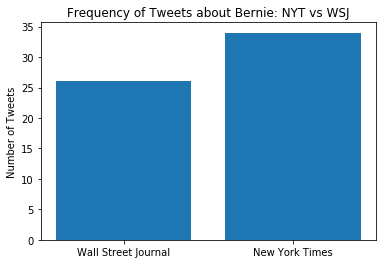

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
#
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
#
#plt.show()

objects = ('Wall Street Journal', 'New York Times')
pos = np.arange(len(objects))
frequency = [len(BernWSJ.index), len(BernNYT.index)]

plt.bar(pos, frequency)
plt.xticks(pos, objects)
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets about Bernie: NYT vs WSJ')
plt.show()

Text(0.5, 1.0, 'Emotional Score of Tweets About Bernie')

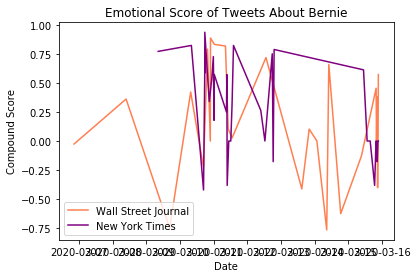

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(BernWSJ['date'], compound1, color = 'coral', label="Wall Street Journal")
plt.plot(BernNYT['date'], compound2, color = 'purple', label = 'New York Times')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Compound Score')
plt.title('Emotional Score of Tweets About Bernie')

In [66]:
len(Bernie.index)

60

In [70]:
len(Bernie['tweet'])

60

In [71]:
len(compound)

60

In [68]:
#!pip install vaderSentiment

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences1 = BernWSJ['tweet'].tolist()

compound1 = []

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences1:
    vs = analyzer.polarity_scores(sentence)
    compound1.append(vs['compound'])

    
sentences2 = BernNYT['tweet'].tolist()

compound2 = []

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences2:
    vs = analyzer.polarity_scores(sentence)
    compound2.append(vs['compound'])
